In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torchvision
from torch.utils.data import Dataset, DataLoader

In [5]:
# Read in the CSV data
df = pd.read_csv('SPY-daily-2022-2023.csv', header=0)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-03-15,419.769989,426.839996,418.420013,426.170013,419.366486,106219100
1,2022-03-16,429.890015,435.679993,424.799988,435.619995,428.665619,144954800
2,2022-03-17,433.589996,441.070007,433.190002,441.070007,434.028625,102676900
3,2022-03-18,438.000000,444.859985,437.220001,444.519989,438.782471,106345500
4,2022-03-21,444.339996,446.459991,440.679993,444.390015,438.654144,88349800
...,...,...,...,...,...,...,...
247,2023-03-09,399.739990,401.480011,390.529999,391.559998,391.559998,111945300
248,2023-03-10,390.989990,393.160004,384.320007,385.910004,385.910004,189105300
249,2023-03-13,381.809998,390.390015,380.649994,385.359985,385.359985,157790000
250,2023-03-14,390.500000,393.450012,387.049988,391.730011,391.730011,149504500


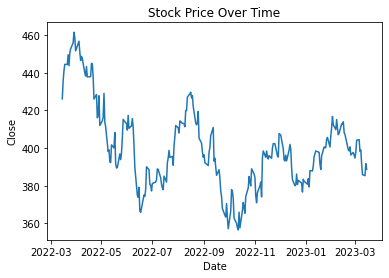

In [9]:
# Convert the 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Plot the 'Open' column over time
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Close')

plt.title('Stock Price Over Time')
plt.show()

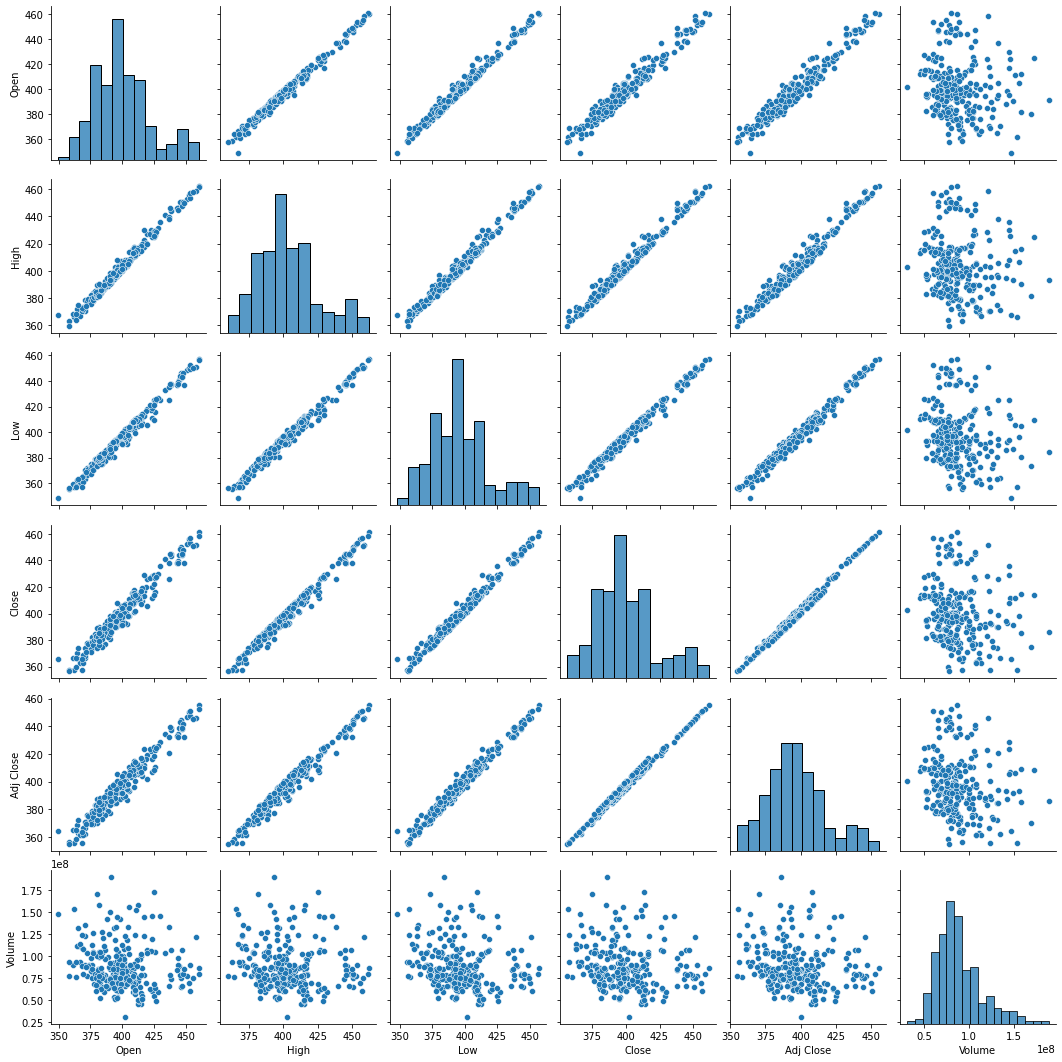

In [10]:
import seaborn as sns

# Convert the 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Create a pairplot
sns.pairplot(df)
plt.show()

In [11]:
# Convert the 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year, month, and day as separate columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Drop the original 'Date' column
df = df.drop(columns=['Date'])
df

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,419.769989,426.839996,418.420013,426.170013,419.366486,106219100,2022,3,15
1,429.890015,435.679993,424.799988,435.619995,428.665619,144954800,2022,3,16
2,433.589996,441.070007,433.190002,441.070007,434.028625,102676900,2022,3,17
3,438.000000,444.859985,437.220001,444.519989,438.782471,106345500,2022,3,18
4,444.339996,446.459991,440.679993,444.390015,438.654144,88349800,2022,3,21
...,...,...,...,...,...,...,...,...,...
247,399.739990,401.480011,390.529999,391.559998,391.559998,111945300,2023,3,9
248,390.989990,393.160004,384.320007,385.910004,385.910004,189105300,2023,3,10
249,381.809998,390.390015,380.649994,385.359985,385.359985,157790000,2023,3,13
250,390.500000,393.450012,387.049988,391.730011,391.730011,149504500,2023,3,14


In [16]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df)

# Split the data into training and testing sets
train_size = int(len(df_scaled) * 0.8)
test_size = len(df_scaled) - train_size
train, test = df_scaled[0:train_size,:], df_scaled[train_size:len(df_scaled),:]
df_scaled[:,3]

array([0.66301573, 0.75302414, 0.80493397, 0.83779407, 0.8365561 ,
       0.88608445, 0.83093626, 0.89465664, 0.91561114, 0.94628075,
       1.        , 0.97285478, 0.90561031, 0.91780193, 0.95475759,
       0.89980008, 0.8568435 , 0.87827412, 0.86684463, 0.7939806 ,
       0.77845527, 0.82626925, 0.77369291, 0.77540728, 0.84274711,
       0.83960379, 0.77626448, 0.66177748, 0.68530354, 0.56710176,
       0.57824552, 0.67863613, 0.52805036, 0.55167176, 0.56976867,
       0.69054202, 0.54529008, 0.52176401, 0.39632364, 0.40508622,
       0.34469955, 0.34079437, 0.43013627, 0.41461094, 0.49299947,
       0.33622241, 0.31336314, 0.31498248, 0.38441774, 0.35555787,
       0.38870369, 0.46432998, 0.55910103, 0.53690828, 0.50509575,
       0.57938873, 0.51414436, 0.52605025, 0.56367271, 0.52062109,
       0.42746936, 0.31660152, 0.17563581, 0.16487283, 0.21563974,
       0.09610436, 0.08857975, 0.17630261, 0.16982588, 0.20478143,
       0.31926843, 0.30507668, 0.22945041, 0.22649776, 0.19706

In [ ]:
# Convert the data into a 3D array (a sequence with t timesteps and d dimensions)
def create_sequences(data, t):
    X, y = [], []
    for i in range(len(data)-t-1):
        a = data[i:i + t, :]
        X.append(a)
        y.append(data[i + t, :])
    return np.array(X), np.array(y)

In [ ]:
# Create sequences of t timesteps with d dimensions
t = 10 # timesteps
d = 9 # dimensions (including year, month, and day)
X_train, y_train = create_sequences(train, t)
X_test, y_test = create_sequences(test, t)


# Build the model
model = Sequential()
model.add(LSTM(50, input_shape=(t, d)))
model.add(Dense(d))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
history = model.fit(X_train,
                    y_train,
                    epochs=50,
                    batch_size=1,
                    verbose=1
                   )

To visualize the accuracy and loss of a deep learning model, we can use various methods such as:

Plotting the accuracy and loss on the same graph using Matplotlib:

In [ ]:
import matplotlib.pyplot as plt

# Plot loss on the same graph

plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epoch')
plt.legend(['Loss'], loc='upper left')
plt.show()

Testing accuracy of model
Finally, we will test the model and make predictions:

In [ ]:
# Test the model
test_error = model.evaluate(X_test, y_test, verbose=2)
print(f'Test error: {test_error}')
print(f'Accuracy: {(1-test_error) * 100}%')